<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/dish_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo set data (chưa split)

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [2]:
folder='/content/drive/MyDrive/dish_tonghop/'

In [3]:
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('banhchung'):
    output=1.0
  if file.startswith('banhxeo'):
    output=2.0
  if file.startswith('bunbo'):
    output=3.0
  if file.startswith('cakho'):
    output=4.0
  if file.startswith('canhcachua'):
    output=5.0
  if file.startswith('goicuon'):
    output=6.0
  if file.startswith('ngo'):
    output=7.0
  if file.startswith('raumuong'):
    output=8.0
  if file.startswith('xucxich'):
    output=9.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [4]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/photo_dish.npy',photos)
save('/content/drive/MyDrive/label_dish.npy',labels)

In [5]:
photos.shape

(1988, 100, 100, 3)

In [6]:
labels.shape

(1988,)

split data thành 70% train, 30% test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)
#test_x, test_y = train_test_split(photos,labels, test_size=0.3)

In [9]:
train_x.shape

(1391, 100, 100, 3)

In [10]:
test_x.shape

(597, 100, 100, 3)

scale lại data

In [11]:
train_x = train_x.reshape([1391,100,100,3])
train_x = train_x.astype('float32')
train_x = train_x/255

In [12]:
test_x = test_x.reshape([597,100,100,3])
test_x = test_x.astype('float32')
test_x = test_x/255

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [14]:
train_x.shape

(1391, 100, 100, 3)

In [15]:
y_train.shape

(1391, 10)

tạo mô hình CNN

In [16]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [17]:
batch_size = 100
epochs = 10
classes = 10

In [18]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))

In [19]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [23]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [24]:
train = model.fit(train_x,y_train,batch_size=64,epochs=15,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/15
22/22 [==============================] - 44s 2s/step - loss: 2.5204 - accuracy: 0.2602
Epoch 2/15
22/22 [==============================] - 42s 2s/step - loss: 1.4586 - accuracy: 0.4982
Epoch 3/15
22/22 [==============================] - 42s 2s/step - loss: 1.0676 - accuracy: 0.6456
Epoch 4/15
22/22 [==============================] - 42s 2s/step - loss: 0.8385 - accuracy: 0.7290
Epoch 5/15
22/22 [==============================] - 42s 2s/step - loss: 0.5724 - accuracy: 0.8210
Epoch 6/15
22/22 [==============================] - 42s 2s/step - loss: 0.3353 - accuracy: 0.9065
Epoch 7/15
22/22 [==============================] - 42s 2s/step - loss: 0.2301 - accuracy: 0.9382
Epoch 8/15
22/22 [==============================] - 46s 2s/step - loss: 0.1750 - accuracy: 0.9526
Epoch 9/15
22/22 [==============================] - 42s 2s/step - loss: 0.1022 - accuracy: 0.9756
Epoch 10/15
22/22 [==============================] - 42s 2s/step - loss: 0.0740 - accuracy: 0.9806
Epoch 11/15
22/22 [

In [33]:
model.save('/content/drive/MyDrive/dish_detection.h5')

1/1 [==============================] - 0s 42ms/step
[9]
Đây là xúc xích


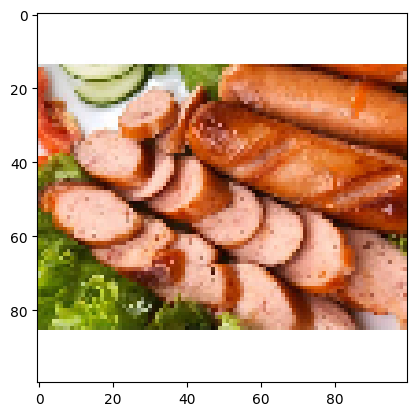

In [32]:
#test mo hinh
from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('xucxichtest.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đây là bánh chưng")
if (a == 2):
  print("Đây là bánh xèo")
if (a == 3):
  print("Đây là bún bò")
if (a == 4):
  print("Đây là cá kho")
if (a == 5):
  print("Đây là canh cà chua")
if (a == 6):
  print("Đây là gỏi cuốn")
if (a == 7):
  print("Đây là ngô")
if (a == 8):
  print("Đây là rau muống")
if (a == 9):
  print("Đây là xúc xích")